In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

In [59]:

df = pd.read_excel('data_set_09-08-2023.xlsx', engine='openpyxl')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Fase atual                                      2289 non-null   object        
 1   Etiquetas                                       2289 non-null   object        
 2   Empreendimento                                  2289 non-null   object        
 3   Modulo do Sistema                               2289 non-null   object        
 4   Tipo de Chamado                                 2289 non-null   object        
 5   Primeira vez que entrou na fase Inicio          2289 non-null   datetime64[ns]
 6   Última vez que saiu da fase Inicio              2289 non-null   datetime64[ns]
 7   Primeira vez que entrou na fase Em atendimento  2114 non-null   datetime64[ns]
 8   Última vez que saiu da fase Em atendimento      

In [61]:
df["Primeira vez que entrou na fase Inicio"].head()

0   2023-01-02 11:17:31.668
1   2023-01-02 11:35:34.256
2   2023-01-02 11:36:02.568
3   2023-01-02 13:03:06.932
4   2023-01-02 13:29:19.637
Name: Primeira vez que entrou na fase Inicio, dtype: datetime64[ns]

In [62]:
df.rename(columns={'Primeira vez que entrou na fase Inicio': 'start_inicio',
                   'Última vez que saiu da fase Inicio': 'end_inicio',
                   'Primeira vez que entrou na fase Em atendimento':'start_atendimento',
                   'Última vez que saiu da fase Em atendimento':'end_atendimento'}, inplace = True)

In [63]:
df.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
0,Concluído,Alta,MKTP - 02,Vendas,Problema,2023-01-02 11:17:31.668,2023-01-02 11:54:42.790,NaT,NaT,Joice Moraes,619791131
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34.256,2023-01-02 11:55:10.949,2023-01-02 11:55:10.971,2023-01-02 11:56:29.075,Artur Carlos Do Nascimento,619805536
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:02.568,2023-01-02 11:56:48.253,2023-01-02 11:56:48.265,2023-01-02 11:58:43.027,Leticia Silva,619805795
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:06.932,2023-01-02 19:07:16.786,2023-01-02 19:07:16.801,2023-03-30 11:02:09.634,Marcelo Tavares,619847781
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:19.637,2023-01-02 17:24:47.336,2023-01-02 17:24:47.358,2023-01-02 17:26:52.021,Tiago Amaral,619857549


In [64]:
df["start_inicio"] = df["start_inicio"].dt.round("S")

In [65]:
df.sort_values(['Fase atual'],ascending = True)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
0,Concluído,Alta,MKTP - 02,Vendas,Problema,2023-01-02 11:17:32,2023-01-02 11:54:42.790,NaT,NaT,Joice Moraes,619791131
1534,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-05-25 16:24:21,2023-05-25 16:47:30.973,2023-05-25 16:47:30.995,2023-05-25 16:49:30.854,Celeste,716624649
1533,Concluído,Alta,Fit Market Analia Franco,Estoque - Entrada de produtos,Solicitacao,2023-05-25 16:05:51,2023-05-25 16:45:34.453,2023-05-25 16:45:34.478,2023-05-25 16:47:11.400,FELIPE SILVA RAMOS,716609588
1532,Concluído,Urgente,Nutra Fit Higienopolis,Estoque - Reposicao de Lojas,Solicitacao,2023-05-25 16:01:23,2023-05-25 16:24:11.277,2023-05-25 16:24:11.291,2023-05-25 16:29:40.769,HELIO RAMOS,716606954
1531,Concluído,Urgente,Nutra Fit Higienopolis,Estoque - Reposicao de Lojas,Solicitacao,2023-05-25 15:59:10,2023-05-25 16:23:29.584,2023-05-25 16:23:29.601,2023-05-25 16:23:53.818,HELIO RAMOS,716604871
...,...,...,...,...,...,...,...,...,...,...,...
1411,Direcionado para 2o nivel,Alta,MKTP - 02,Vendas,Problema,2023-05-15 10:15:53,2023-05-15 10:16:04.907,NaT,NaT,SUPORTE NIVEL 1,703735430
1410,Direcionado para 2o nivel,Alta,Todos Empreendimentos,Relatorio,Problema,2023-05-15 10:12:16,2023-05-15 10:13:27.454,NaT,NaT,SUPORTE NIVEL 1,703731179
594,Direcionado para 2o nivel,Crítica,CR Nutriton,PDV / Pedidos,"Problema, Solicitacao",2023-02-24 11:20:44,2023-02-27 09:41:16.632,NaT,NaT,JEISON MAGALHÃES,650632319
1414,Direcionado para 2o nivel,Alta,Todos Empreendimentos,Relatorio,Problema,2023-05-15 13:17:26,2023-05-15 13:18:11.455,NaT,NaT,SUPORTE NIVEL 1,703978268


In [66]:
df.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
0,Concluído,Alta,MKTP - 02,Vendas,Problema,2023-01-02 11:17:32,2023-01-02 11:54:42.790,NaT,NaT,Joice Moraes,619791131
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:10.949,2023-01-02 11:55:10.971,2023-01-02 11:56:29.075,Artur Carlos Do Nascimento,619805536
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48.253,2023-01-02 11:56:48.265,2023-01-02 11:58:43.027,Leticia Silva,619805795
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:16.786,2023-01-02 19:07:16.801,2023-03-30 11:02:09.634,Marcelo Tavares,619847781
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47.336,2023-01-02 17:24:47.358,2023-01-02 17:26:52.021,Tiago Amaral,619857549


In [67]:
df["end_inicio"] = df["end_inicio"].dt.round("S")

In [68]:
df["start_atendimento"] = df["start_atendimento"].dt.round("S")
df["end_atendimento"] = df["end_atendimento"].dt.round("S")

In [69]:
df.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
0,Concluído,Alta,MKTP - 02,Vendas,Problema,2023-01-02 11:17:32,2023-01-02 11:54:43,NaT,NaT,Joice Moraes,619791131
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Fase atual           2289 non-null   object        
 1   Etiquetas            2289 non-null   object        
 2   Empreendimento       2289 non-null   object        
 3   Modulo do Sistema    2289 non-null   object        
 4   Tipo de Chamado      2289 non-null   object        
 5   start_inicio         2289 non-null   datetime64[ns]
 6   end_inicio           2289 non-null   datetime64[ns]
 7   start_atendimento    2114 non-null   datetime64[ns]
 8   end_atendimento      2114 non-null   datetime64[ns]
 9   Nome do solicitante  2289 non-null   object        
 10  Código               2289 non-null   int64         
dtypes: datetime64[ns](4), int64(1), object(6)
memory usage: 196.8+ KB


In [71]:
df1 = df.dropna()

In [72]:
df1.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549
5,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478


In [73]:
df2 = df1[df1["Fase atual"].str.contains("Concluído|Em atendimento|Inicio") == True]

In [74]:
df2.sort_values(['Fase atual'],ascending = True)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536
1584,Concluído,Urgente,GLC SP,Estoque - Entrada de produtos,Problema,2023-05-30 13:21:09,2023-05-30 15:30:27,2023-05-30 15:30:27,2023-05-30 15:46:10,Paulo Costa Moreira Pereira,719633837
1583,Concluído,Urgente,Nutra Fit Santa Cruz,Estoque - Entrada de produtos,Solicitacao,2023-05-30 12:16:03,2023-05-30 15:27:04,2023-05-30 15:27:04,2023-05-30 15:29:40,Juliana lehm,719571264
1582,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-05-30 09:02:00,2023-05-30 10:21:49,2023-05-30 10:21:49,2023-05-30 10:22:13,Celeste,719392677
1581,Concluído,Urgente,HOT FIT CENTER 3,Estoque - Baixa Manual (Saída),Solicitacao,2023-05-29 21:33:49,2023-05-30 10:17:40,2023-05-30 10:17:40,2023-05-30 10:18:00,Jamil chahoud,719187319
...,...,...,...,...,...,...,...,...,...,...,...
832,Concluído,Alta,Nutra Fit Villa Lobos,Vendas,Solicitacao,2023-03-17 19:56:31,2023-03-18 10:04:59,2023-03-18 10:04:59,2023-03-18 10:10:58,thiago,660576071
831,Concluído,Urgente,Fit Market Analia Franco,Estoque - Reposicao de Lojas,Solicitacao,2023-03-17 19:10:49,2023-03-18 10:00:12,2023-03-18 10:00:12,2023-03-18 10:04:34,Wellington Esteves,660566071
830,Concluído,Alta,Nutra Fit Center 3,Vendas,Solicitacao,2023-03-17 18:28:00,2023-03-18 09:57:13,2023-03-18 09:57:13,2023-03-18 09:59:52,Jamil,660554591
844,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-03-20 12:15:47,2023-03-20 15:33:25,2023-03-20 15:33:25,2023-03-20 15:40:24,anderson,661347151


In [75]:
df2["tempo_inicio"] = df2["end_inicio"] - df2["start_inicio"]

C:\Users\bruno\AppData\Local\Temp\ipykernel_14680\4273797739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["tempo_inicio"] = df2["end_inicio"] - df2["start_inicio"]


In [76]:
df2.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27
5,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00


In [77]:
df2["tempo_atendimento"] = df2["end_atendimento"] - df2["start_atendimento"]

C:\Users\bruno\AppData\Local\Temp\ipykernel_14680\2344192344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["tempo_atendimento"] = df2["end_atendimento"] - df2["start_atendimento"]


In [78]:
df2.head(20)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37,0 days 00:01:18
2,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45,0 days 00:01:55
3,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10,86 days 15:54:53
4,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27,0 days 00:02:05
5,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00,0 days 00:00:15
7,Concluído,Alta,Nutra Fit Patio Paulista,Vendas,Solicitacao,2023-01-02 17:59:05,2023-01-02 19:26:37,2023-01-02 19:26:37,2023-01-02 19:26:50,Jamil Chahoud,619987550,0 days 01:27:32,0 days 00:00:13
8,Concluído,Alta,Nutra Fit Jardim Sul,Estoque - Inventário,Solicitacao,2023-01-02 19:52:50,2023-01-03 09:39:34,2023-01-03 09:39:34,2023-01-03 09:43:28,Samy Ghassan Taha,620025695,0 days 13:46:44,0 days 00:03:54
9,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 20:16:12,2023-01-03 09:45:38,2023-01-03 09:45:38,2023-01-03 09:48:55,Artur Carlos Do Nascimento,620030831,0 days 13:29:26,0 days 00:03:17
10,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 21:35:19,2023-01-03 09:49:16,2023-01-03 09:49:16,2023-01-03 09:50:32,Artur Carlos Do Nascimento,620049818,0 days 12:13:57,0 days 00:01:16
11,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-03 09:35:34,2023-01-03 09:57:47,2023-01-03 09:57:47,2023-01-03 09:57:59,Leticia Silva,620220944,0 days 00:22:13,0 days 00:00:12


In [79]:
df2['tempo_atendimento'].mean()

Timedelta('0 days 02:01:47.030776515')

In [80]:
df2.sort_values(['tempo_inicio'],ascending = True)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento
550,Concluído,Média,CR Nutriton,PDV / Pedidos,Solicitacao,2023-02-17 16:10:57,2023-02-17 16:11:03,2023-02-17 16:11:03,2023-02-17 16:11:10,SARA,648242917,0 days 00:00:06,0 days 00:00:07
846,Concluído,Urgente,CR Nutrition,Importacao de Vendas,Solicitacao,2023-03-20 12:45:29,2023-03-20 12:45:41,2023-03-20 12:45:41,2023-03-20 13:04:35,Celeste,661363348,0 days 00:00:12,0 days 00:18:54
522,Concluído,Urgente,Nutra Fit Frei Caneca,Estoque - Reposicao de Lojas,Solicitacao,2023-02-16 13:22:50,2023-02-16 13:23:06,2023-02-16 13:23:06,2023-02-16 13:37:19,JAMIL Chahoud,647617657,0 days 00:00:16,0 days 00:14:13
645,Concluído,Alta,CR Nutriton,Importacao de Vendas,Solicitacao,2023-03-01 08:58:20,2023-03-01 08:58:38,2023-03-01 08:58:38,2023-03-01 09:00:32,Leticia Silva,652738937,0 days 00:00:18,0 days 00:01:54
1155,Concluído,Média,Nutra Fit Villa Lobos,Produtos,Solicitacao,2023-04-20 12:03:35,2023-04-20 12:03:55,2023-04-20 12:03:55,2023-04-20 12:07:04,Thiago,677381830,0 days 00:00:20,0 days 00:03:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-06 16:33:59,2023-01-09 08:05:37,2023-01-09 08:05:37,2023-01-09 08:06:38,Leticia Silva,622079438,2 days 15:31:38,0 days 00:01:01
1976,Concluído,Baixa,Nutra Fit Morumbi Town,Estoque - Baixa Manual (Saída),Solicitacao,2023-07-07 16:17:46,2023-07-10 08:22:20,2023-07-10 08:22:20,2023-07-10 08:22:32,Tiago Amaral,739784326,2 days 16:04:34,0 days 00:00:12
965,Concluído,Alta,MKTP - 02,Separacao/Conferencia,Solicitacao,2023-03-31 16:03:44,2023-04-03 08:25:38,2023-04-03 08:25:38,2023-04-03 08:47:50,Rogério,667344462,2 days 16:21:54,0 days 00:22:12
1698,Concluído,Urgente,Todos Empreendimentos,Relatorio,Solicitacao,2023-06-07 15:01:02,2023-06-13 09:46:32,2023-06-13 09:46:32,2023-06-14 11:40:14,Vania Barboza,724642378,5 days 18:45:30,1 days 01:53:42


In [81]:
df2['tempo_atendimento'].max()

Timedelta('86 days 15:54:53')

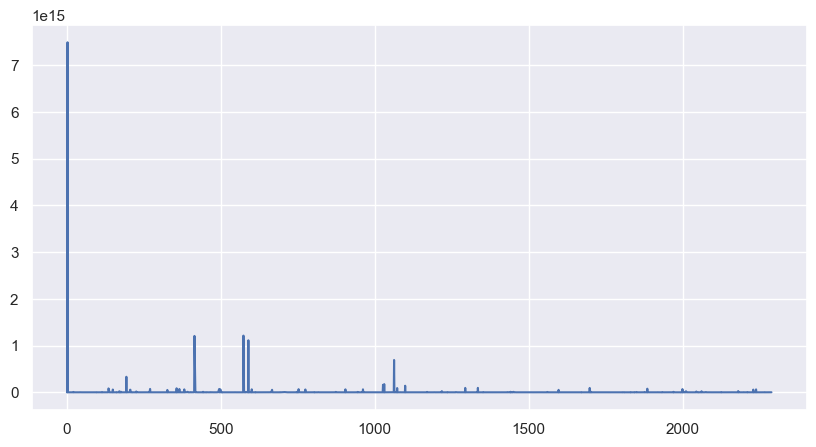

In [82]:
plt.plot(df2['tempo_atendimento'])

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112 entries, 1 to 2288
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Fase atual           2112 non-null   object         
 1   Etiquetas            2112 non-null   object         
 2   Empreendimento       2112 non-null   object         
 3   Modulo do Sistema    2112 non-null   object         
 4   Tipo de Chamado      2112 non-null   object         
 5   start_inicio         2112 non-null   datetime64[ns] 
 6   end_inicio           2112 non-null   datetime64[ns] 
 7   start_atendimento    2112 non-null   datetime64[ns] 
 8   end_atendimento      2112 non-null   datetime64[ns] 
 9   Nome do solicitante  2112 non-null   object         
 10  Código               2112 non-null   int64          
 11  tempo_inicio         2112 non-null   timedelta64[ns]
 12  tempo_atendimento    2112 non-null   timedelta64[ns]
dtypes: datetime64[ns](

In [84]:
df2.reset_index(drop=True, inplace=True)

In [85]:
df2.sort_values(['Fase atual'],ascending = False)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento
0,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37,0 days 00:01:18
1403,Concluído,Baixa,Nutra Fit Posto Morumbi,Vendas,Solicitacao,2023-05-29 20:20:27,2023-05-30 08:17:45,2023-05-30 08:17:45,2023-05-30 08:18:10,Tiago Amaral,719152393,0 days 11:57:18,0 days 00:00:25
1417,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-05-30 15:40:17,2023-05-30 16:03:34,2023-05-30 16:03:34,2023-05-30 16:05:57,Leticia Silva,719769694,0 days 00:23:17,0 days 00:02:23
1416,Concluído,Urgente,GLC SP,Estoque - Entrada de produtos,Problema,2023-05-30 13:21:09,2023-05-30 15:30:27,2023-05-30 15:30:27,2023-05-30 15:46:10,Paulo Costa Moreira Pereira,719633837,0 days 02:09:18,0 days 00:15:43
1415,Concluído,Urgente,Nutra Fit Santa Cruz,Estoque - Entrada de produtos,Solicitacao,2023-05-30 12:16:03,2023-05-30 15:27:04,2023-05-30 15:27:04,2023-05-30 15:29:40,Juliana lehm,719571264,0 days 03:11:01,0 days 00:02:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,Concluído,Urgente,Nutra Fit Patio Paulista,Vendas,Solicitacao,2023-03-18 12:12:19,2023-03-18 12:13:01,2023-03-18 12:13:01,2023-03-18 12:14:17,Jamil Lacerda,660761233,0 days 00:00:42,0 days 00:01:16
697,Concluído,Urgente,Fit Market Tambore,Produtos,Solicitacao,2023-03-18 09:49:35,2023-03-18 10:11:19,2023-03-18 10:11:19,2023-03-18 10:20:25,jose jefferson,660729752,0 days 00:21:44,0 days 00:09:06
696,Concluído,Alta,Nutra Fit Villa Lobos,Vendas,Solicitacao,2023-03-17 19:56:31,2023-03-18 10:04:59,2023-03-18 10:04:59,2023-03-18 10:10:58,thiago,660576071,0 days 14:08:28,0 days 00:05:59
695,Concluído,Urgente,Fit Market Analia Franco,Estoque - Reposicao de Lojas,Solicitacao,2023-03-17 19:10:49,2023-03-18 10:00:12,2023-03-18 10:00:12,2023-03-18 10:04:34,Wellington Esteves,660566071,0 days 14:49:23,0 days 00:04:22


In [86]:
list_atendimento = []
list_inicio = []
for i in range(len(df2.index)):
    s = df2['tempo_atendimento'][i].total_seconds()
    s2 = df2['tempo_inicio'][i].total_seconds()
    hours = s // 3600
    hours2 = s2 // 3600 
    s = s - (hours * 3600)
    s2 = s2 - (hours2 * 3600)
    minutes = s // 60
    minutes2 = s2 // 60
    seconds = s - (minutes * 60)
    seconds2 = s2 - (minutes2 * 60)
    list_atendimento.append(('{:02}:{:02}:{:02}'.format(int(hours), int(minutes), int(seconds))))
    list_inicio.append(('{:02}:{:02}:{:02}'.format(int(hours2), int(minutes2), int(seconds2))))

df2['tempo_atendimento_continuo'] = list_atendimento
df2['tempo_inicio_continuo'] = list_inicio

C:\Users\bruno\AppData\Local\Temp\ipykernel_14680\4163477250.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tempo_atendimento_continuo'] = list_atendimento
C:\Users\bruno\AppData\Local\Temp\ipykernel_14680\4163477250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tempo_inicio_continuo'] = list_inicio


In [87]:
df2['tempo_inicio'].max()

Timedelta('15 days 17:52:53')

In [88]:
df2.sort_values(['Fase atual'],ascending = False)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
0,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37,0 days 00:01:18,00:01:18,00:19:37
1403,Concluído,Baixa,Nutra Fit Posto Morumbi,Vendas,Solicitacao,2023-05-29 20:20:27,2023-05-30 08:17:45,2023-05-30 08:17:45,2023-05-30 08:18:10,Tiago Amaral,719152393,0 days 11:57:18,0 days 00:00:25,00:00:25,11:57:18
1417,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-05-30 15:40:17,2023-05-30 16:03:34,2023-05-30 16:03:34,2023-05-30 16:05:57,Leticia Silva,719769694,0 days 00:23:17,0 days 00:02:23,00:02:23,00:23:17
1416,Concluído,Urgente,GLC SP,Estoque - Entrada de produtos,Problema,2023-05-30 13:21:09,2023-05-30 15:30:27,2023-05-30 15:30:27,2023-05-30 15:46:10,Paulo Costa Moreira Pereira,719633837,0 days 02:09:18,0 days 00:15:43,00:15:43,02:09:18
1415,Concluído,Urgente,Nutra Fit Santa Cruz,Estoque - Entrada de produtos,Solicitacao,2023-05-30 12:16:03,2023-05-30 15:27:04,2023-05-30 15:27:04,2023-05-30 15:29:40,Juliana lehm,719571264,0 days 03:11:01,0 days 00:02:36,00:02:36,03:11:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,Concluído,Urgente,Nutra Fit Patio Paulista,Vendas,Solicitacao,2023-03-18 12:12:19,2023-03-18 12:13:01,2023-03-18 12:13:01,2023-03-18 12:14:17,Jamil Lacerda,660761233,0 days 00:00:42,0 days 00:01:16,00:01:16,00:00:42
697,Concluído,Urgente,Fit Market Tambore,Produtos,Solicitacao,2023-03-18 09:49:35,2023-03-18 10:11:19,2023-03-18 10:11:19,2023-03-18 10:20:25,jose jefferson,660729752,0 days 00:21:44,0 days 00:09:06,00:09:06,00:21:44
696,Concluído,Alta,Nutra Fit Villa Lobos,Vendas,Solicitacao,2023-03-17 19:56:31,2023-03-18 10:04:59,2023-03-18 10:04:59,2023-03-18 10:10:58,thiago,660576071,0 days 14:08:28,0 days 00:05:59,00:05:59,14:08:28
695,Concluído,Urgente,Fit Market Analia Franco,Estoque - Reposicao de Lojas,Solicitacao,2023-03-17 19:10:49,2023-03-18 10:00:12,2023-03-18 10:00:12,2023-03-18 10:04:34,Wellington Esteves,660566071,0 days 14:49:23,0 days 00:04:22,00:04:22,14:49:23


In [89]:
df1.sort_values(['Fase atual'],ascending = True)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código
1,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536
1583,Concluído,Urgente,Nutra Fit Santa Cruz,Estoque - Entrada de produtos,Solicitacao,2023-05-30 12:16:03,2023-05-30 15:27:04,2023-05-30 15:27:04,2023-05-30 15:29:40,Juliana lehm,719571264
1582,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-05-30 09:02:00,2023-05-30 10:21:49,2023-05-30 10:21:49,2023-05-30 10:22:13,Celeste,719392677
1581,Concluído,Urgente,HOT FIT CENTER 3,Estoque - Baixa Manual (Saída),Solicitacao,2023-05-29 21:33:49,2023-05-30 10:17:40,2023-05-30 10:17:40,2023-05-30 10:18:00,Jamil chahoud,719187319
1580,Concluído,Urgente,HOT FIT CENTER 3,Estoque - Entrada de produtos,Solicitacao,2023-05-29 21:23:24,2023-05-30 10:11:26,2023-05-30 10:11:26,2023-05-30 10:12:25,Jamil chahoud,719183024
...,...,...,...,...,...,...,...,...,...,...,...
840,Concluído,Baixa,Fit Market Tambore,Vendas,Solicitacao,2023-03-19 14:50:35,2023-03-20 08:15:43,2023-03-20 08:15:43,2023-03-20 08:16:41,vinicius diniz satelis,661036439
841,Concluído,Média,Fit Market Cidade Jardim,Vendas,Solicitacao,2023-03-19 20:51:18,2023-03-20 08:17:13,2023-03-20 08:17:13,2023-03-20 08:17:59,Tiago Amaral,661108288
2288,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-08-09 10:02:24,2023-08-09 10:41:05,2023-08-09 10:41:05,2023-08-09 10:56:53,Anderson,770095528
178,Direcionado para 2o nivel,Média,CR Nutriton,Relatorio,Problema,2023-01-18 10:08:20,2023-01-18 12:16:53,2023-01-18 12:16:53,2023-01-18 14:39:09,VERA LUCIA DE SOUZA,627394733


In [90]:
df2.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
0,Concluído,Urgente,Nutra Fit Eldorado,Vendas,Solicitacao,2023-01-02 11:35:34,2023-01-02 11:55:11,2023-01-02 11:55:11,2023-01-02 11:56:29,Artur Carlos Do Nascimento,619805536,0 days 00:19:37,0 days 00:01:18,00:01:18,00:19:37
1,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45,0 days 00:01:55,00:01:55,00:20:45
2,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10,86 days 15:54:53,2079:54:53,06:04:10
3,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27,0 days 00:02:05,00:02:05,03:55:27
4,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00,0 days 00:00:15,00:00:15,05:20:00


In [91]:
df3 = df2.sort_values(['start_inicio'],ascending = False)

In [92]:
df3

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
2111,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-08-09 10:02:24,2023-08-09 10:41:05,2023-08-09 10:41:05,2023-08-09 10:56:53,Anderson,770095528,0 days 00:38:41,0 days 00:15:48,00:15:48,00:38:41
2110,Concluído,Média,Nutra Fit Posto Morumbi,Estoque - Baixa Manual (Saída),Solicitacao,2023-08-09 09:44:39,2023-08-09 10:36:04,2023-08-09 10:36:04,2023-08-09 10:40:30,Tiago Amaral,770073010,0 days 00:51:25,0 days 00:04:26,00:04:26,00:51:25
2109,Concluído,Crítica,CR Nutrition,Importacao de Vendas,Solicitacao,2023-08-09 09:30:40,2023-08-09 10:06:27,2023-08-09 10:06:27,2023-08-09 10:32:42,Leticia Silva,770058478,0 days 00:35:47,0 days 00:26:15,00:26:15,00:35:47
2108,Concluído,Urgente,Nutra Fit Moema,Estoque - Reposicao de Lojas,Solicitacao,2023-08-08 21:31:59,2023-08-09 08:30:55,2023-08-09 08:30:55,2023-08-09 08:35:24,Kaio Brito,769464548,0 days 10:58:56,0 days 00:04:29,00:04:29,10:58:56
2107,Concluído,Urgente,Nutra Fit Santa Cruz,Estoque - Baixa Manual (Saída),Solicitacao,2023-08-08 21:27:09,2023-08-09 08:28:04,2023-08-09 08:28:04,2023-08-09 08:30:40,Wellington Esteves,769460502,0 days 11:00:55,0 days 00:02:36,00:02:36,11:00:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00,0 days 00:00:15,00:00:15,05:20:00
3,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27,0 days 00:02:05,00:02:05,03:55:27
2,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10,86 days 15:54:53,2079:54:53,06:04:10
1,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45,0 days 00:01:55,00:01:55,00:20:45


In [93]:
df3.reset_index(drop=True, inplace=True)

In [94]:
df3

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
0,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-08-09 10:02:24,2023-08-09 10:41:05,2023-08-09 10:41:05,2023-08-09 10:56:53,Anderson,770095528,0 days 00:38:41,0 days 00:15:48,00:15:48,00:38:41
1,Concluído,Média,Nutra Fit Posto Morumbi,Estoque - Baixa Manual (Saída),Solicitacao,2023-08-09 09:44:39,2023-08-09 10:36:04,2023-08-09 10:36:04,2023-08-09 10:40:30,Tiago Amaral,770073010,0 days 00:51:25,0 days 00:04:26,00:04:26,00:51:25
2,Concluído,Crítica,CR Nutrition,Importacao de Vendas,Solicitacao,2023-08-09 09:30:40,2023-08-09 10:06:27,2023-08-09 10:06:27,2023-08-09 10:32:42,Leticia Silva,770058478,0 days 00:35:47,0 days 00:26:15,00:26:15,00:35:47
3,Concluído,Urgente,Nutra Fit Moema,Estoque - Reposicao de Lojas,Solicitacao,2023-08-08 21:31:59,2023-08-09 08:30:55,2023-08-09 08:30:55,2023-08-09 08:35:24,Kaio Brito,769464548,0 days 10:58:56,0 days 00:04:29,00:04:29,10:58:56
4,Concluído,Urgente,Nutra Fit Santa Cruz,Estoque - Baixa Manual (Saída),Solicitacao,2023-08-08 21:27:09,2023-08-09 08:28:04,2023-08-09 08:28:04,2023-08-09 08:30:40,Wellington Esteves,769460502,0 days 11:00:55,0 days 00:02:36,00:02:36,11:00:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,Concluído,Alta,Fit Market Analia Franco,Vendas,Duvida,2023-01-02 13:50:00,2023-01-02 19:10:00,2023-01-02 19:10:00,2023-01-02 19:10:15,felipe chagas,619871478,0 days 05:20:00,0 days 00:00:15,00:00:15,05:20:00
2108,Concluído,Baixa,Nutra Fit Market Place,Vendas,Solicitacao,2023-01-02 13:29:20,2023-01-02 17:24:47,2023-01-02 17:24:47,2023-01-02 17:26:52,Tiago Amaral,619857549,0 days 03:55:27,0 days 00:02:05,00:02:05,03:55:27
2109,Concluído,Média,CR Nutriton,Relatorio,Solicitacao,2023-01-02 13:03:07,2023-01-02 19:07:17,2023-01-02 19:07:17,2023-03-30 11:02:10,Marcelo Tavares,619847781,0 days 06:04:10,86 days 15:54:53,2079:54:53,06:04:10
2110,Concluído,Baixa,CR Nutriton,Importacao de Vendas,Solicitacao,2023-01-02 11:36:03,2023-01-02 11:56:48,2023-01-02 11:56:48,2023-01-02 11:58:43,Leticia Silva,619805795,0 days 00:20:45,0 days 00:01:55,00:01:55,00:20:45


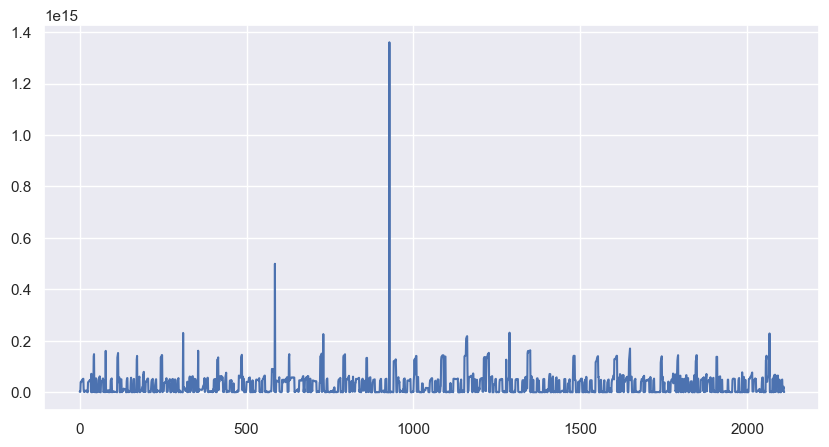

In [95]:
plt.plot(df3['tempo_inicio'])

<Axes: >

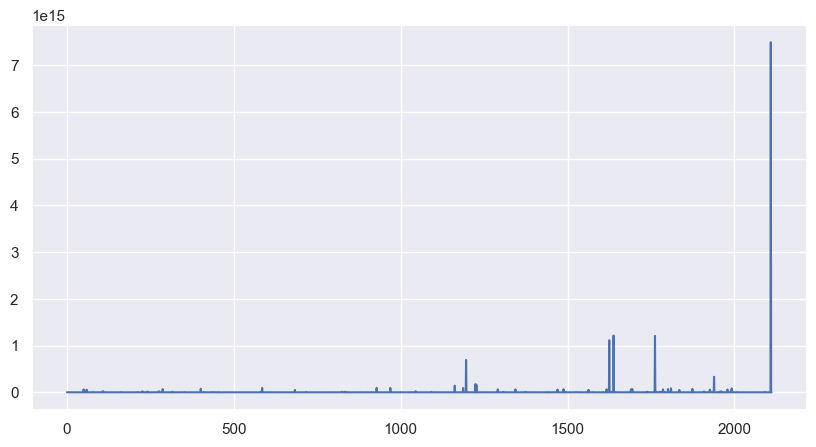

In [96]:
df3['tempo_atendimento'].plot()

In [97]:
df3["Empreendimento - Solicitante"] =  df3["Nome do solicitante"] + " - " + df3['Empreendimento']

In [98]:
df3.head()

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo,Empreendimento - Solicitante
0,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-08-09 10:02:24,2023-08-09 10:41:05,2023-08-09 10:41:05,2023-08-09 10:56:53,Anderson,770095528,0 days 00:38:41,0 days 00:15:48,00:15:48,00:38:41,Anderson - Fit Market Morumbi
1,Concluído,Média,Nutra Fit Posto Morumbi,Estoque - Baixa Manual (Saída),Solicitacao,2023-08-09 09:44:39,2023-08-09 10:36:04,2023-08-09 10:36:04,2023-08-09 10:40:30,Tiago Amaral,770073010,0 days 00:51:25,0 days 00:04:26,00:04:26,00:51:25,Tiago Amaral - Nutra Fit Posto Morumbi
2,Concluído,Crítica,CR Nutrition,Importacao de Vendas,Solicitacao,2023-08-09 09:30:40,2023-08-09 10:06:27,2023-08-09 10:06:27,2023-08-09 10:32:42,Leticia Silva,770058478,0 days 00:35:47,0 days 00:26:15,00:26:15,00:35:47,Leticia Silva - CR Nutrition
3,Concluído,Urgente,Nutra Fit Moema,Estoque - Reposicao de Lojas,Solicitacao,2023-08-08 21:31:59,2023-08-09 08:30:55,2023-08-09 08:30:55,2023-08-09 08:35:24,Kaio Brito,769464548,0 days 10:58:56,0 days 00:04:29,00:04:29,10:58:56,Kaio Brito - Nutra Fit Moema
4,Concluído,Urgente,Nutra Fit Santa Cruz,Estoque - Baixa Manual (Saída),Solicitacao,2023-08-08 21:27:09,2023-08-09 08:28:04,2023-08-09 08:28:04,2023-08-09 08:30:40,Wellington Esteves,769460502,0 days 11:00:55,0 days 00:02:36,00:02:36,11:00:55,Wellington Esteves - Nutra Fit Santa Cruz


In [99]:
df3.sort_values(['Fase atual'],ascending = False)

,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,Nome do solicitante,Código,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo,Empreendimento - Solicitante
0,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-08-09 10:02:24,2023-08-09 10:41:05,2023-08-09 10:41:05,2023-08-09 10:56:53,Anderson,770095528,0 days 00:38:41,0 days 00:15:48,00:15:48,00:38:41,Anderson - Fit Market Morumbi
1403,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-03-20 12:15:47,2023-03-20 15:33:25,2023-03-20 15:33:25,2023-03-20 15:40:24,anderson,661347151,0 days 03:17:38,0 days 00:06:59,00:06:59,03:17:38,anderson - Fit Market Morumbi
1417,Concluído,Alta,Nutra Fit Center 3,Vendas,Solicitacao,2023-03-17 18:28:00,2023-03-18 09:57:13,2023-03-18 09:57:13,2023-03-18 09:59:52,Jamil,660554591,0 days 15:29:13,0 days 00:02:39,00:02:39,15:29:13,Jamil - Nutra Fit Center 3
1416,Concluído,Urgente,Fit Market Analia Franco,Estoque - Reposicao de Lojas,Solicitacao,2023-03-17 19:10:49,2023-03-18 10:00:12,2023-03-18 10:00:12,2023-03-18 10:04:34,Wellington Esteves,660566071,0 days 14:49:23,0 days 00:04:22,00:04:22,14:49:23,Wellington Esteves - Fit Market Analia Franco
1415,Concluído,Alta,Nutra Fit Villa Lobos,Vendas,Solicitacao,2023-03-17 19:56:31,2023-03-18 10:04:59,2023-03-18 10:04:59,2023-03-18 10:10:58,thiago,660576071,0 days 14:08:28,0 days 00:05:59,00:05:59,14:08:28,thiago - Nutra Fit Villa Lobos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,Concluído,Urgente,HOT FIT CENTER 3,Estoque - Baixa Manual (Saída),Solicitacao,2023-05-29 21:33:49,2023-05-30 10:17:40,2023-05-30 10:17:40,2023-05-30 10:18:00,Jamil chahoud,719187319,0 days 12:43:51,0 days 00:00:20,00:00:20,12:43:51,Jamil chahoud - HOT FIT CENTER 3
697,Concluído,Alta,CR Nutrition,Importacao de Vendas,Solicitacao,2023-05-30 09:02:00,2023-05-30 10:21:49,2023-05-30 10:21:49,2023-05-30 10:22:13,Celeste,719392677,0 days 01:19:49,0 days 00:00:24,00:00:24,01:19:49,Celeste - CR Nutrition
696,Concluído,Urgente,Nutra Fit Santa Cruz,Estoque - Entrada de produtos,Solicitacao,2023-05-30 12:16:03,2023-05-30 15:27:04,2023-05-30 15:27:04,2023-05-30 15:29:40,Juliana lehm,719571264,0 days 03:11:01,0 days 00:02:36,00:02:36,03:11:01,Juliana lehm - Nutra Fit Santa Cruz
695,Concluído,Urgente,GLC SP,Estoque - Entrada de produtos,Problema,2023-05-30 13:21:09,2023-05-30 15:30:27,2023-05-30 15:30:27,2023-05-30 15:46:10,Paulo Costa Moreira Pereira,719633837,0 days 02:09:18,0 days 00:15:43,00:15:43,02:09:18,Paulo Costa Moreira Pereira - GLC SP


In [100]:
df4 = df3[df3.columns[[10,15,0,1,2,3,4,5,6,7,8,9,11,12,13,14]]]

In [101]:
df4 = df4[df4.columns[[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15]]]

In [102]:
df4.head()

,Código,Empreendimento - Solicitante,Fase atual,Etiquetas,Empreendimento,Modulo do Sistema,Tipo de Chamado,start_inicio,end_inicio,start_atendimento,end_atendimento,tempo_inicio,tempo_atendimento,tempo_atendimento_continuo,tempo_inicio_continuo
0,770095528,Anderson - Fit Market Morumbi,Concluído,Alta,Fit Market Morumbi,Estoque - Reposicao de Lojas,Solicitacao,2023-08-09 10:02:24,2023-08-09 10:41:05,2023-08-09 10:41:05,2023-08-09 10:56:53,0 days 00:38:41,0 days 00:15:48,00:15:48,00:38:41
1,770073010,Tiago Amaral - Nutra Fit Posto Morumbi,Concluído,Média,Nutra Fit Posto Morumbi,Estoque - Baixa Manual (Saída),Solicitacao,2023-08-09 09:44:39,2023-08-09 10:36:04,2023-08-09 10:36:04,2023-08-09 10:40:30,0 days 00:51:25,0 days 00:04:26,00:04:26,00:51:25
2,770058478,Leticia Silva - CR Nutrition,Concluído,Crítica,CR Nutrition,Importacao de Vendas,Solicitacao,2023-08-09 09:30:40,2023-08-09 10:06:27,2023-08-09 10:06:27,2023-08-09 10:32:42,0 days 00:35:47,0 days 00:26:15,00:26:15,00:35:47
3,769464548,Kaio Brito - Nutra Fit Moema,Concluído,Urgente,Nutra Fit Moema,Estoque - Reposicao de Lojas,Solicitacao,2023-08-08 21:31:59,2023-08-09 08:30:55,2023-08-09 08:30:55,2023-08-09 08:35:24,0 days 10:58:56,0 days 00:04:29,00:04:29,10:58:56
4,769460502,Wellington Esteves - Nutra Fit Santa Cruz,Concluído,Urgente,Nutra Fit Santa Cruz,Estoque - Baixa Manual (Saída),Solicitacao,2023-08-08 21:27:09,2023-08-09 08:28:04,2023-08-09 08:28:04,2023-08-09 08:30:40,0 days 11:00:55,0 days 00:02:36,00:02:36,11:00:55


In [57]:
df4.to_csv('2023_08_09_BasePipefy.csv', index = False)